# House Price Prediction

1. simplest model
2. outliers
3. pca lda 

sklearn and statsmodels

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from utils import *
data = fetch_california_housing(as_frame=True)

# Data Exploration

In [2]:
print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [3]:
print(data.DESCR)
feature_names = data.feature_names
target_name = data.target_names
X, y = data.data, data.target

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
data.frame.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1132,1.7788,14.0,3.899811,1.056711,934.0,1.765595,39.76,-121.62,0.858
1291,2.7234,44.0,5.810219,1.060219,1399.0,2.552920,38.01,-121.80,1.102
7957,3.0893,42.0,4.686610,1.056980,1161.0,3.307692,33.88,-118.17,1.627
238,2.4167,45.0,4.462025,1.124473,1530.0,3.227848,37.79,-122.21,1.394
17690,5.6058,19.0,6.033999,1.022666,7817.0,4.218564,37.31,-121.83,2.327


In [5]:
### statistical data description
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
# for feature in feature_names:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X[feature], y=y)
#     plt.title(f"Scatter Plot entre {feature} et MedHouseVal")
#     plt.xlabel(feature)
#     plt.ylabel("MedHouseVal (Prix médian des maisons)")
#     plt.show()

In [7]:
X.isna().sum().sum()

np.int64(0)

# Simplest model

### Separation & Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training model

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

### Results

In [11]:
pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

resid_train = y_train - pred_train
resid_test = y_test - pred_test

In [12]:
from sklearn.metrics import root_mean_squared_error, r2_score

rmse_train = root_mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

rmse_test = root_mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f"RMSE for train set : {rmse_train}")
print(f"R2 for train set : {r2_train}\n")
print(f"RMSE for test set : {rmse_test}")
print(f"R2 for test set : {r2_test}")

RMSE for train set : 0.7234346057708156
R2 for train set : 0.609345972797216

RMSE for test set : 0.7284008391515452
R2 for test set : 0.5957702326061665


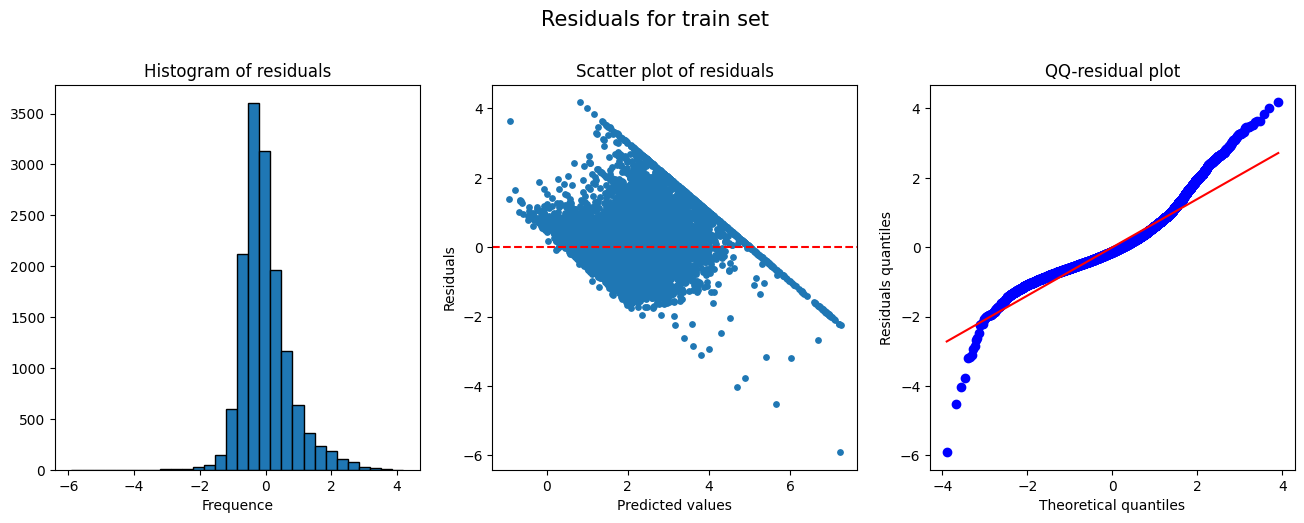

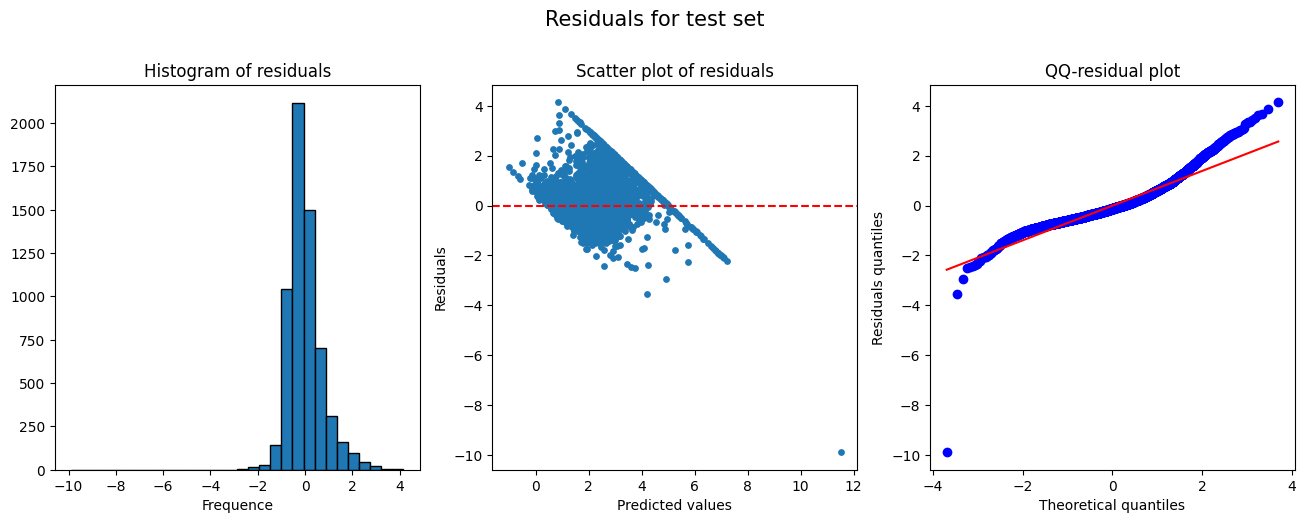

In [13]:
plot_residuals(resid_train, pred_train, "Residuals for train set")
plot_residuals(resid_test, pred_test, "Residuals for test set")

**1. Histogramme des résidus (à gauche) :**    
La distribution des résidus semble suivre une forme normale avec une moyenne autour de zéro, ce qui est souhaitable. Cela indique que le modèle n’a pas de biais significatif et que les erreurs sont généralement centrées autour de zéro. Cependant, on remarque quelques valeurs extrêmes, ce qui pourrait indiquer la présence de quelques observations atypiques ou de la variance non prise en compte par le modèle.

**2. Nuage de points des résidus en fonction des valeurs prédites (au centre) :**   
Ce graphique montre que les résidus ne sont pas parfaitement aléatoires ; il y a une structure diagonale, suggérant une hétéroscédasticité (les résidus augmentent ou diminuent avec les valeurs prédites). Cela pourrait indiquer que le modèle a une difficulté à capturer certaines tendances ou variances dans les données.

**3. Graphique QQ des résidus (à droite) :**   
Ce graphique de normalité des résidus montre une déviation des résidus par rapport à la ligne de normalité, surtout aux extrémités (queues de distribution). Cela signifie que les résidus ne suivent pas parfaitement une distribution normale, ce qui pourrait affecter la performance et l'interprétation du modèle, surtout si l'analyse repose sur l'hypothèse de normalité.

In [14]:
# sns.displot(resid_train, kind="kde", fill=True)
# plt.title("Distribution of residuals for train set")
# plt.show()

# sns.displot(resid_test, kind="kde", fill=True)
# plt.title("Distribution of residuals for test set")
# plt.show()

### With Statsmodels

In [15]:
import statsmodels.formula.api as smf

X_train = pd.DataFrame(X_train, columns=feature_names)
X_train['MedHouseVal'] = np.array(y_train)
model = smf.ols(formula=f"MedHouseVal ~ {'+'.join(feature_names)}", data=X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2815.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:58:50   Log-Likelihood:                -15823.
No. Observations:               14448   AIC:                         3.166e+04
Df Residuals:                   14439   BIC:                         3.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0692      0.006    343.700      0.000       2.057       2.081
MedInc         0.8492      0.010     89.283      0.000       0.831       0.868
HouseAge       0.1221      0.007     18.240      0.000       0.109       0.135
AveRooms      -0.2996      0.017    -17.362      0.000      -0.333      -0.266
AveBedrms      0.3484      0.016     21.978      0.000       0.317       0.379
Population    -0.0009      0.006     -0.138      0.890      -0.013       0.012
AveOccup      -0.0417      0.006     -6.889      0.000      -0.054      -0.030
Latitude      -0.8939      0.018    -49.265      0.000      -0.929      -0.858
Longitude     -0.8686      0.018    -48.757      0.000      -0.904      -0.834
==============================================================================
Omnibus:                     2973.049   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8566.499
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       6.091   Cond. No.                         6.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
coefficients = lr.coef_
intercept = lr.intercept_

# Affichage des coefficients
print("Coefficients :", coefficients)
print("Intercept :", intercept)

# Si vous souhaitez afficher les coefficients avec les noms des features
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i+1}' for i in range(X.shape[1])]
coeff_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

coeff_df

Coefficients : [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
Intercept : 2.0692396089424165


,Feature,Coefficient
0,MedInc,0.849222
1,HouseAge,0.122119
2,AveRooms,-0.299558
3,AveBedrms,0.348410
4,Population,-0.000884
5,AveOccup,-0.041698
6,Latitude,-0.893856
7,Longitude,-0.868617


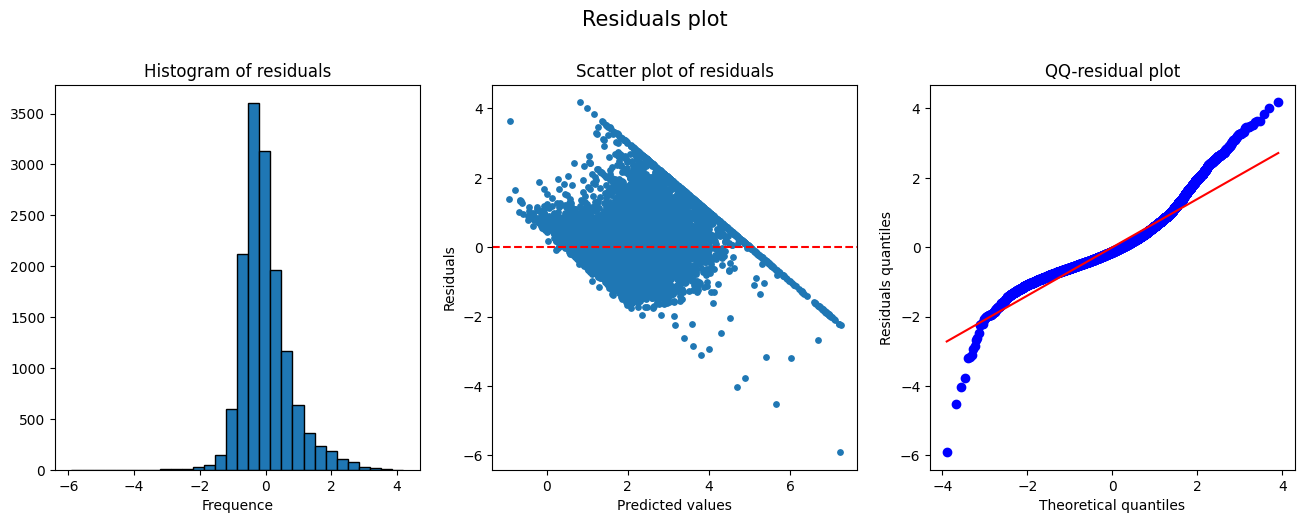

In [17]:
plot_residuals(res.resid, res.fittedvalues, 'Residuals plot')

In [20]:
y_pred = res.predict()

# Removing Outliers

In [35]:
def plot_boxplot(dataframe, title='', fliers = True, return_whiskers = True, feature_name=''):
    fig, ax = plt.subplots(1, 1)# figsize=(20, 7))
    box = ax.boxplot(dataframe[feature_name], showfliers=fliers)
    ax.set_title(feature_name)
    lower_whisker = box['whiskers'][0].get_ydata()[1]
    upper_whisker = box['whiskers'][1].get_ydata()[1]
    print(f'--------{feature_name}--------')
    print(f"Lower Whisker: {lower_whisker}")
    print(f"Upper Whisker: {upper_whisker}\n")
    plt.tight_layout()

    plt.show()
    plt.close()
    if return_whiskers:
        return lower_whisker, upper_whisker

In [ ]:
all_whiskers = {}

for feature in feature_names:
    all_whiskers[feature] = plot_boxplot(X, feature_name=feature)

In [37]:
all_whiskers

{'MedInc': (np.float64(0.536), np.float64(8.0727)),
 'HouseAge': (np.float64(1.0), np.float64(52.0)),
 'AveRooms': (np.float64(2.225165562913907), np.float64(8.18840579710145)),
 'AveBedrms': (np.float64(0.8737541528239202), np.float64(1.2173913043478262)),
 'Population': (np.float64(5.0), np.float64(2840.0)),
 'AveOccup': (np.float64(1.2396166134185302), np.float64(4.418230563002681)),
 'Latitude': (np.float64(32.54), np.float64(41.95)),
 'Longitude': (np.float64(-124.35), np.float64(-114.57))}

In [38]:
# removing outliers
out_feat = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
X = data.frame

df = X[
    (X[out_feat[0]] >= all_whiskers[out_feat[0]][0]) & (X[out_feat[0]] <= all_whiskers[out_feat[0]][1]) &
    (X[out_feat[1]] >= all_whiskers[out_feat[1]][0]) & (X[out_feat[1]] <= all_whiskers[out_feat[1]][1]) &
    (X[out_feat[2]] >= all_whiskers[out_feat[2]][0]) & (X[out_feat[2]] <= all_whiskers[out_feat[2]][1]) &
    (X[out_feat[3]] >= all_whiskers[out_feat[3]][0]) & (X[out_feat[3]] <= all_whiskers[out_feat[3]][1]) &
    (X[out_feat[4]] >= all_whiskers[out_feat[4]][0]) & (X[out_feat[4]] <= all_whiskers[out_feat[4]][1])
    ].reset_index(drop=True)

In [ ]:
for feature in feature_names[:-2]:
    plot_boxplot(df, feature_name=feature, return_whiskers=False)

### Separating & scaling

In [49]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=43)
X_train2, X_api, y_train2, y_api = train_test_split(X_train2, y_train2, test_size=0.001, random_state=43)

scaler2 = StandardScaler()

X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [51]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

### Results

In [52]:
pred_test2 = lr2.predict(X_test2)
pred_train2 = lr2.predict(X_train2)

resid_train2 = y_train2 - pred_train2
resid_test2 = y_test2 - pred_test2

In [53]:
rmse_train2 = root_mean_squared_error(y_train2, pred_train2)
r2_train2 = r2_score(y_train2, pred_train2)

rmse_test2 = root_mean_squared_error(y_test2, pred_test2)
r2_test2 = r2_score(y_test2, pred_test2)

print(f"RMSE for train2 set : {rmse_train2}")
print(f"R2 for train2 set : {r2_train2}\n")
print(f"RMSE for test2 set : {rmse_test2}")
print(f"R2 for test2 set : {r2_test2}")

RMSE for train2 set : 0.6473600444372882
R2 for train2 set : 0.6800370600556458

RMSE for test2 set : 0.6437124897404997
R2 for test2 set : 0.6786194668255301


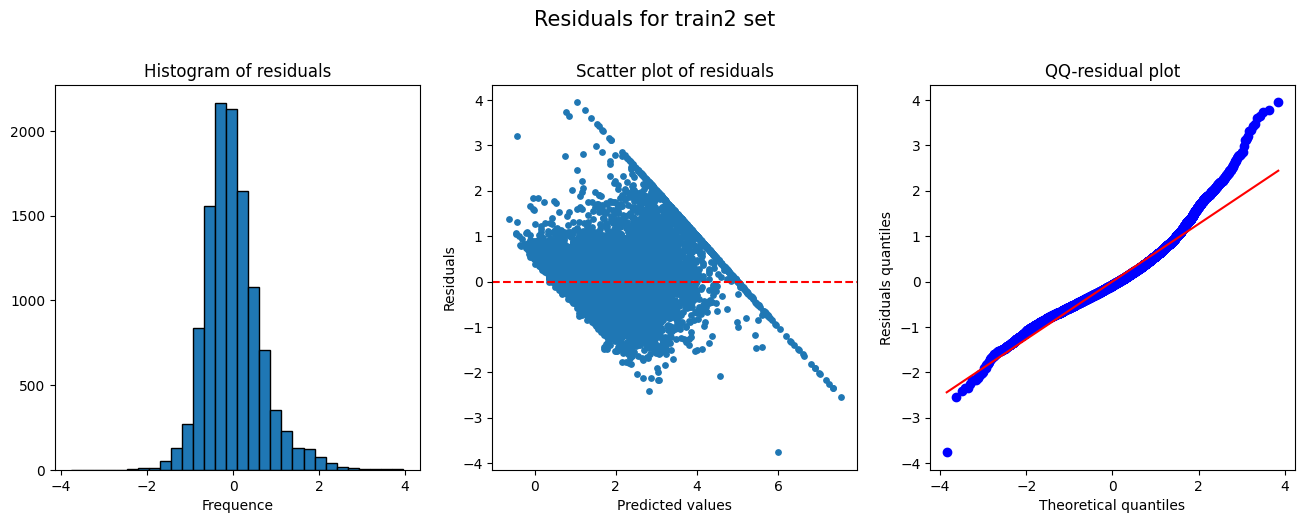

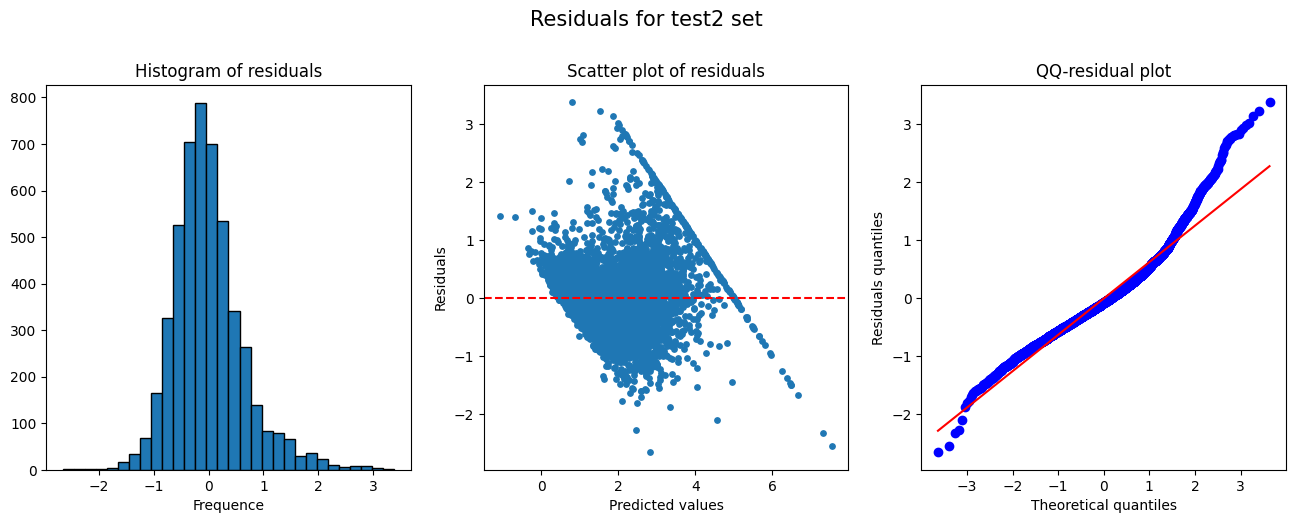

In [54]:
plot_residuals(resid_train2, pred_train2, "Residuals for train2 set")
plot_residuals(resid_test2, pred_test2, "Residuals for test2 set")

### Prediction

In [73]:
np.array(y_test2)
# pred_test2.shape

array([1.5  , 4.357, 3.901, ..., 2.265, 3.5  , 3.793])

In [75]:
pd.DataFrame({'y_test2': y_test2, 'pred_test2': pred_test2})

,y_test2,pred_test2
11063,1.50000,1.860294
12639,4.35700,2.922245
7805,3.90100,4.154715
10154,0.80200,0.755623
12779,5.00001,3.046704
...,...,...
4766,2.54500,2.572482
12440,5.00000,3.156069
13743,2.26500,1.975547
7060,3.50000,2.610867


In [58]:
X_api = X_api.reset_index(drop=True)
y_api = y_api.reset_index(drop=True)
data_api = pd.concat([X_api, y_api], axis=1)
data_api.to_csv('data.csv', index=False)

In [46]:
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [66]:
new = np.array(X_api.loc[5])
new_scaled = scaler2.transform([new])

lr2.predict(new_scaled)

c:\Users\Achille Nguessie\Desktop\house_pricing\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2.99488039])

### Saving the model

In [86]:
import pickle

pickle.dump(lr2, open('regmodel.pkl', 'wb'))
pickle.dump(scaler2, open('stdscaler.pkl', 'wb'))